In [1]:
from sklearn import datasets
import pandas as pd
#!conda install --yes graphviz

## Preparando o Dataset

**OBSERVAÇÃO**: Dessa vez, usaremos os dados diretamente do sklearn

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df['target_name'] = pd.Categorical.from_codes(iris['target'], iris['target_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## Modelando

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop(columns=['target', 'target_name']) #Definindo os parâmetros do modelo sem as variáveis target
y = df[['target']] #É costume colocar o X maiúsculo e o y minúsculo

In [7]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state = 7)

**Conferindo os datasets**

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105, 1)
(45, 1)


**Construindo e treinando o modelo**

In [9]:
clf = DecisionTreeClassifier(criterion='entropy') #Definindo o critério do modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

**Predição**

In [10]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1])

**Verificação de acurácia do modelo**

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
print(f'Acurácia: {(accuracy_score(y_test, y_pred)*100):.2f}%') 
#A resposta vem calculada de 0-1, então multiplicamos por 100 para visualização intuitiva

Acurácia: 86.67%


### Visualizando a Árvore (Sim, é possível)

#### Método 1 (GraphViz)

In [13]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names,
                          filled=True, rounded=True,
                          special_characters=True)

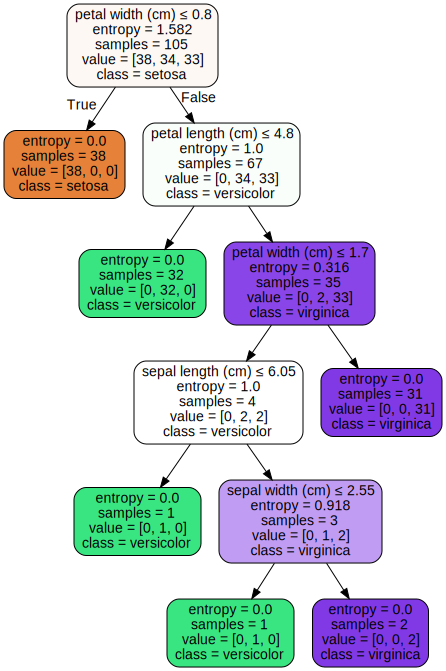

In [14]:
graph = graphviz.Source(dot_data)
graph

#### Método 2 (DTreeViz)

In [15]:
#!pip install dtreeviz

In [16]:
from dtreeviz.trees import *
viz = dtreeviz(clf,
              X_train.values,
              y_train['target'].values,
              target_name= 'target',
              feature_names=X_train.columns, 
              class_names=['setosa', 'versicolor', 'virginica'],
              histtype='barstacked')
#Esse classificador precisa ter especificado os nomes das classes

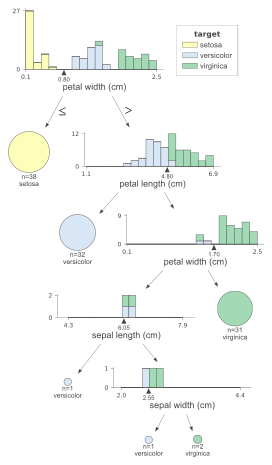

In [17]:
viz

#### Checando o caminho de uma folha (valor-resposta) específica

In [18]:
viz_pred = dtreeviz(clf,
                   X_train,
                   y_train['target'].values,
                   target_name='variety',
                   orientation='TD',
                   feature_names=X_train.columns,
                   X=X_test.iloc[[3]].values[0], #Ponto de observação da predição
                   class_names=['setosa', 'versicolor', 'virginica'],
                   show_just_path=True)

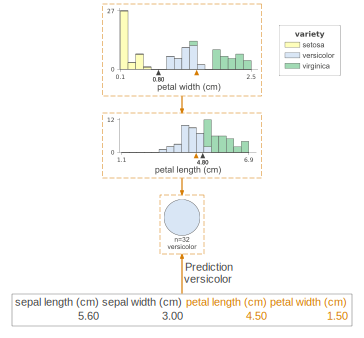

In [19]:
viz_pred